In [1]:
# data process

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [46]:
import pint

In [47]:
ureg = pint.UnitRegistry()

In [2]:
with open('f1.dat') as f:
    data = []
    tmp = []
    for line in f:
        line = line.strip()
        if line == '':
            data.append(np.array(tmp))
            tmp = []
            continue
        x, y = line.strip().split()
        tmp.append((float(x), - float(y)))
    data.append(tmp)

In [6]:
zero_px = data[0][0]
y_max_px = data[0][1,1] - zero_px[1]
x_max_px = data[0][2,0] - zero_px[0]

In [7]:
def scele_log_10(v, d_min, d_max):
    d_min = np.log10(d_min)
    d_max = np.log10(d_max)
    return 10**(v * (d_max - d_min) + d_min)

In [17]:
def scale_linear(v, d_min, d_max):
    return v * (d_max - d_min) + d_min

In [9]:
coordinates = []
for d in data[1:]:
    d = (d - zero_px)/(x_max_px, y_max_px)
    x = scale_linear(d[:,0], .5, 1.3)
    y = scele_log_10(d[:,1], 10**-6, 10**-1)
    coordinates.append(np.vstack([x,y]).T)

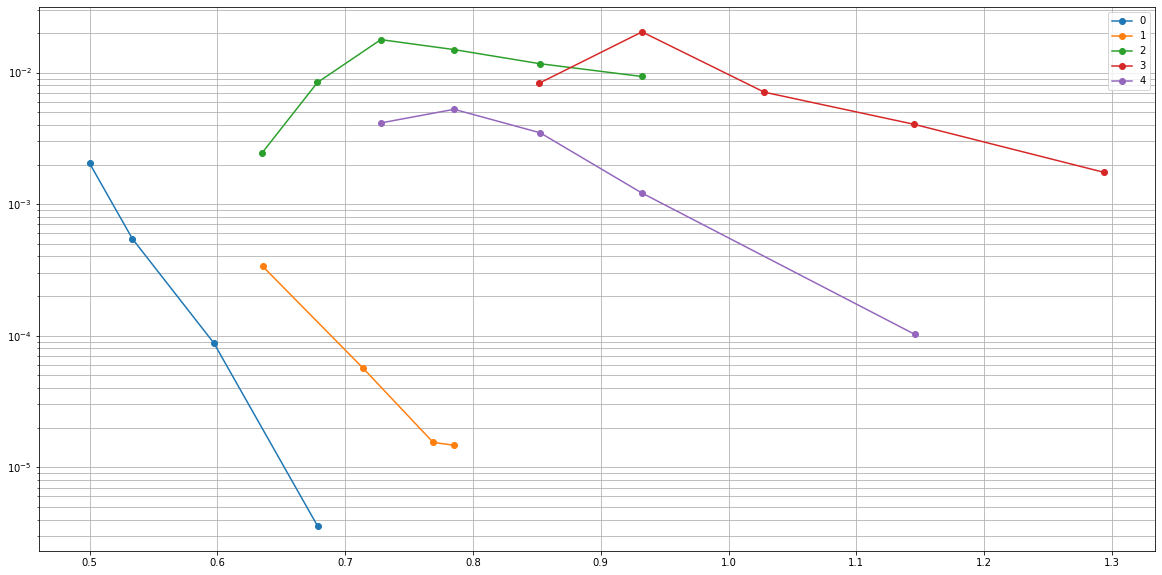

In [10]:
fig, ax = plt.subplots(1,1, figsize=(20,10), sharex=False)
for idx, d in enumerate(coordinates):
    ax.plot(d[:,0],d[:,1], 'o-', label=idx)
ax.set_yscale('log')
ax.grid(which='both')
ax.legend()

In [11]:
import pandas as pd

In [12]:
dfs = []
for a, b in zip(coordinates, ['Tersoff', 'SW115', 'SW', 'Lenosky', 'EDIP']):
    tmp = a.copy()
    tmp[:,0]= 1000/tmp[:,0]
    df = pd.DataFrame(tmp, columns=['t','v'])
    df['pot'] = b
    dfs.append(df)

In [148]:
df = pd.concat(dfs, ignore_index=True)

In [151]:
# df.to_csv('f1.csv')

In [36]:
with open('f3.dat') as f:
    data = []
    tmp = []
    for line in f:
        line = line.strip()
        if line == '':
            data.append(np.array(tmp))
            tmp = []
            continue
        x, y = line.strip().split()
        tmp.append((float(x), - float(y)))
    data.append(tmp)

In [37]:
data

[array([[ 227.75, -560.  ],
        [ 227.25,  -24.25],
        [1365.5 , -558.5 ]]),
 [(1004.25, -219.0), (1061.75, -304.5), (1118.0, -377.25), (1175.5, -471.75)]]

In [38]:
zero_px = data[0][0]
y_max_px = data[0][1,1] - zero_px[1]
x_max_px = data[0][2,0] - zero_px[0]

In [39]:
print(zero_px)

[ 227.75 -560.  ]


In [40]:
y_max_px, x_max_px

(535.75, 1137.75)

In [53]:
coordinates_2 = []
for d in data[1:]:
    d = (d - zero_px)/(x_max_px, y_max_px)
    x = scale_linear(d[:,0], 800, 1800)
    y = scale_linear(d[:,1], 0, 20)
    y = (y * ureg.meter/ureg.second).to(ureg.nanometer/ureg.picosecond).magnitude
    coordinates_2.append(np.vstack([x,y]).T)

In [58]:
df = pd.DataFrame(coordinates_2[0], columns=['t', 'v'])

In [64]:
df['pot'] ='exp_gal_85'

In [66]:
df.to_csv('f3.csv')